## Description
- This code is for learning two things below:
  -  1. Defining a set of logic by using CNF
  -  2. Inferring the conclusion by forward chaining

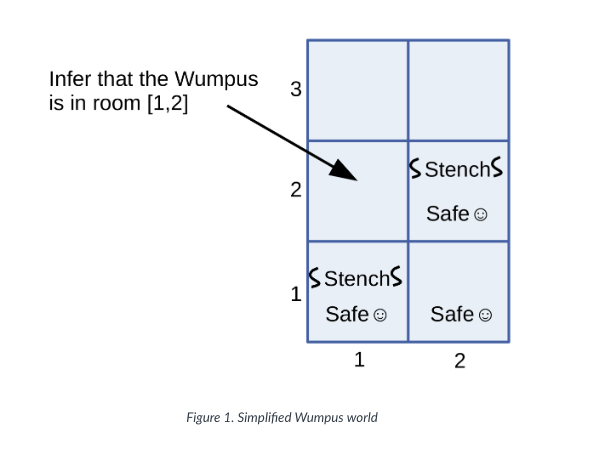

## 1. Defining a set of logic by using CNF

### 1-1. Set up Proposition symbols

*   1: Safe(1,1)
*   2: Safe(1,2)
*   3: Safe(2,1)
*   4: Stench(1,1)
*   5: Wumpus(1,2)
*   6: Wumpus(2,1)

### 1-2. Represent a set of logic by using CNF
*   4 and 2 -> 6 (CNF: not 4 or not 2 or 6)
*   4 and 3 -> 5 (CNF: not 4 or not 2 or 5)

### 1-3. Facts below
*   4
*   1
*   3

## 2. Inferring the conclusion by forward chaining

In [ ]:
class ForwardChaining:
    def __init__(self):
        self.clauses = []  # List of Horn clauses
        self.model = {}    # Dictionary to store the truth values of proposition symbols

    def add_clause(self, clause):
        """
        Add a clause to the knowledge base.
        Clause is a list of integers, where:
        - Positive integers represent positive literals.
        - Negative integers represent negated literals.
        """
        self.clauses.append(clause)

    def forward_chaining(self, num_symbols):
        """
        Perform forward chaining to infer new facts until a fixpoint is reached.
        num_symbols: Total number of proposition symbols.
        """
        # Initialise all symbols in the model to False
        self.model = {i: False for i in range(1, num_symbols + 1)}

        fixpoint = False
        while not fixpoint:
            fixpoint = True  # Assume no new inferences will be made

            for clause in self.clauses:
                # Check if all negated literals in the clause are true
                all_negated_true = all(
                    self.model[abs(lit)] is (lit < 0) for lit in clause if lit < 0
                )

                if all_negated_true:
                    # Check for a positive literal to infer
                    positive_literals = [lit for lit in clause if lit > 0]

                    if positive_literals:
                        positive_lit = positive_literals[0]
                        if not self.model[positive_lit]:
                            # Infer the positive literal
                            self.model[positive_lit] = True
                            fixpoint = False  # A new inference was made
                            print(f"Inferred {positive_lit} from clause {clause}")
                    else:
                        # No positive literal means the clause is a goal clause (conflict)
                        print(f"Conflict: Goal clause {clause} cannot be satisfied.")
                        return False

        print("Final Model:")
        for symbol, value in self.model.items():
            print(f"Variable {symbol} = {value}")

        return True

In [ ]:
# Create an instance of the ForwardChaining class
fc = ForwardChaining()

# Add clauses for the Wumpus world scenario
# Clause format: [-premises, ..., conclusion]
# Proposition symbol numbering:
# 1: Safe(1,1), 2: Safe(1,2), 3: Safe(2,1), 4: Stench(1,1), 5: Wumpus(1,2), 6: Wumpus(2,1)

# Add logic in CNF
fc.add_clause([-4, -2, 6])  # If Stench(1,1) and Safe(1,2), then Wumpus(2,1)
fc.add_clause([-4, -3, 5])  # If Stench(1,1) and Safe(2,1), then Wumpus(1,2)

# Add facts
fc.add_clause([4])  # Stench(1,1)
fc.add_clause([1])  # Safe(1,1)
fc.add_clause([3])  # Safe(2,1)

# Run forward chaining with 6 proposition symbols
result = fc.forward_chaining(6)
print(f"Model exists: {result}")

Inferred 4 from clause [4]
Inferred 1 from clause [1]
Inferred 3 from clause [3]
Inferred 5 from clause [-4, -3, 5]
Final Model:
Variable 1 = True
Variable 2 = False
Variable 3 = True
Variable 4 = True
Variable 5 = True
Variable 6 = False
Model exists: True
